In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("nirf_FULL_DATASET_ranking.csv")

In [3]:
data

,institute_id,name,tlr,rpc,go,oi,perception,city,state,score,rank,Year
0,IR-E-U-0456,Indian Institute of Technology Madras,95.42,94.64,83.90,61.31,100.00,Chennai,Tamil Nadu,89.93,1,2020
1,IR-E-I-1074,Indian Institute of Technology Delhi,90.79,96.15,80.36,64.81,94.46,New Delhi,Delhi,88.08,2,2020
2,IR-E-U-0306,Indian Institute of Technology Bombay,91.00,93.37,77.60,49.99,92.51,Mumbai,Maharashtra,85.08,3,2020
3,IR-E-I-1075,Indian Institute of Technology Kanpur,86.22,82.08,88.44,54.21,85.78,Kanpur,Uttar Pradesh,82.18,4,2020
4,IR-E-U-0573,Indian Institute of Technology Kharagpur,77.32,87.11,83.21,56.62,89.31,Kharagpur,West Bengal,80.56,5,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
595,IR-E-U-0854,KLE Technological University,51.27,10.36,50.84,48.30,4.14,Dharwad,Karnataka,33.90,196,2022
596,IR-E-C-33777,Shri Vile Parle Kelavani Mandal`s Dwarkadas J....,53.37,6.11,58.33,42.72,1.08,Mumbai Suburban,Maharashtra,33.88,197,2022
597,IR-E-C-16504,Sri Venkateswara College of Engineering and Te...,51.15,1.53,59.06,58.36,3.14,Chittoor,Andhra Pradesh,33.77,198,2022
598,IR-E-C-1336,BMS Institute of Technology & Management,46.40,4.77,56.46,54.38,16.80,Bengaluru,Karnataka,33.76,199,2022


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   institute_id  600 non-null    object 
 1   name          600 non-null    object 
 2   tlr           600 non-null    float64
 3   rpc           600 non-null    float64
 4   go            600 non-null    float64
 5   oi            600 non-null    float64
 6   perception    600 non-null    float64
 7   city          600 non-null    object 
 8   state         600 non-null    object 
 9   score         600 non-null    float64
 10  rank          600 non-null    int64  
 11  Year          600 non-null    int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 56.4+ KB


In [5]:
#spliting dataset into training set and testing set
#storing target variable, i.e the score separately (we have to predict score)

from sklearn.model_selection import train_test_split

x = data.drop(['score'],axis='columns') 
y = data['score']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [6]:
#combining the x and y training datasets
train_data = x_train.join(y_train)

#combining the x and y testing datasets
test_data = x_test.join(y_test)

In [7]:
train_data

,institute_id,name,tlr,rpc,go,oi,perception,city,state,rank,Year,score
170,IR-E-C-33584,K. J. Somaiya College of Engineering,51.95,2.84,59.03,39.37,0.55,Mumbai,Maharashtra,171,2020,32.25
175,IR-E-C-16572,Sri Venkateswara College of Engineering,56.18,4.91,48.74,38.31,2.16,Kancheepuram,Tamil Nadu,176,2020,32.12
96,IR-E-C-18154,University College of Engineering,58.25,10.41,59.54,50.97,1.63,Kakinada,Andhra Pradesh,97,2020,37.77
429,IR-E-U-0395,Indian Institute of Technology Jodhpur,78.42,34.93,74.41,66.44,11.78,Jodhpur,Rajasthan,30,2022,56.70
588,IR-E-U-0217,Christ University,45.90,19.22,41.37,52.22,16.07,Bengaluru,Karnataka,189,2022,34.64
...,...,...,...,...,...,...,...,...,...,...,...,...
209,IR-E-U-0237,National Institute of Technology Karnataka,73.15,50.17,78.62,64.54,50.18,Surathkal,Karnataka,10,2021,64.19
561,IR-E-C-19650,Vardhaman College of Engineering,51.89,9.33,54.59,47.99,20.62,Rangareddy,Telangana,162,2022,36.15
278,IR-E-U-0201,Shri Mata Vaishno Devi University,69.07,20.55,47.85,45.49,2.17,Katra,Jammu and Kashmir,79,2021,41.22
535,IR-E-U-0621,National Institute of Technology Puducherry,52.40,10.61,52.53,71.66,9.24,Karaikal,Puducherry,136,2022,37.49


In [8]:
test_data

,institute_id,name,tlr,rpc,go,oi,perception,city,state,rank,Year,score
42,IR-E-U-0014,International Institute of Information Technol...,53.01,36.66,73.92,52.91,24.77,Hyderabad,Telangana,43,2020,49.45
151,IR-E-C-37064,Sri Krishna College of Technology,51.06,4.37,58.86,46.60,3.71,Coimbatore,Tamil Nadu,152,2020,33.43
204,IR-E-U-0573,Indian Institute of Technology Kharagpur,80.51,88.59,83.01,58.46,88.50,Kharagpur,West Bengal,5,2021,82.03
333,IR-E-C-19754,SR University,62.51,6.49,41.74,62.54,8.07,Warangal,Telangana,134,2021,36.11
326,IR-E-U-0175,YMCA University of Science & Tech (Formerely Y...,59.79,6.05,55.73,50.04,6.83,Faridabad,Haryana,127,2021,36.59
...,...,...,...,...,...,...,...,...,...,...,...,...
383,IR-E-C-36022,Lakshmi Narain College of Technology,51.79,1.86,57.61,55.45,0.74,Bhopal,Madhya Pradesh,184,2021,33.23
205,IR-E-U-0560,Indian Institute of Technology Roorkee,79.28,78.13,90.74,63.36,63.59,Roorkee,Uttarakhand,6,2021,78.08
549,IR-E-C-6581,Puducherry Engineering College,46.38,15.51,59.49,54.20,8.80,Puducherry,Puducherry,150,2022,36.77
404,IR-E-U-0573,"Indian Institute of Technology, Kharagpur",79.21,84.60,80.91,53.08,82.63,Kharagpur,West Bengal,5,2022,78.89


array([[<AxesSubplot:title={'center':'tlr'}>,
        <AxesSubplot:title={'center':'rpc'}>,
        <AxesSubplot:title={'center':'go'}>],
       [<AxesSubplot:title={'center':'oi'}>,
        <AxesSubplot:title={'center':'perception'}>,
        <AxesSubplot:title={'center':'rank'}>],
       [<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'score'}>, <AxesSubplot:>]],
      dtype=object)

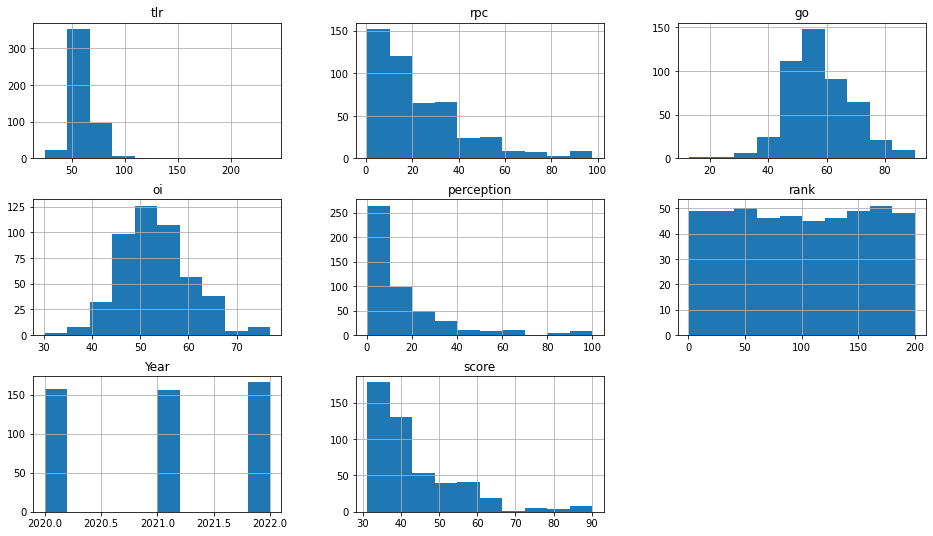

In [9]:
train_data.hist(figsize=(16,9))

<AxesSubplot:>

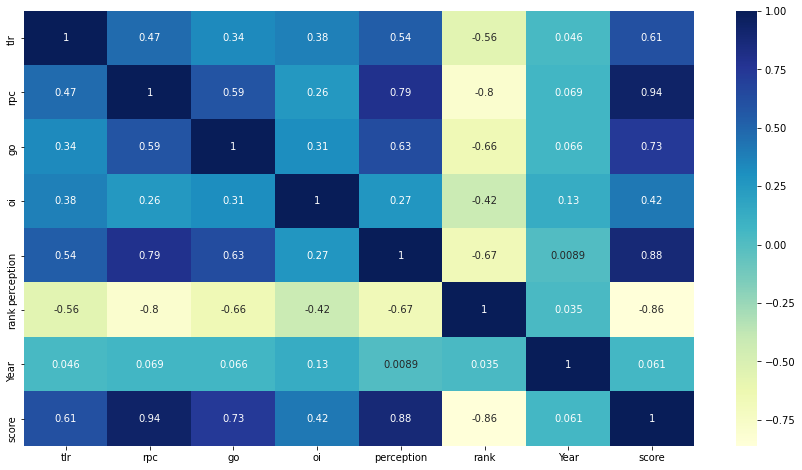

In [10]:
#checking correlation between various parameters
#for linear model we want to check for parameters to have high correlation with the value we want to predict
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

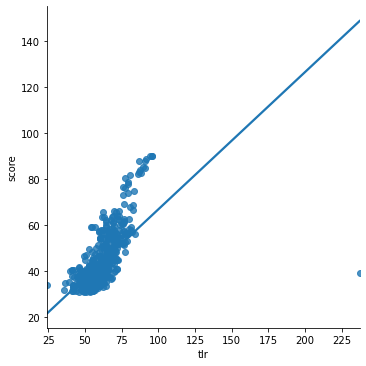

In [11]:
#relation between tlr and score is approximately linear
sns.lmplot(x="tlr", y="score", data=data, fit_reg=True, ci=None)

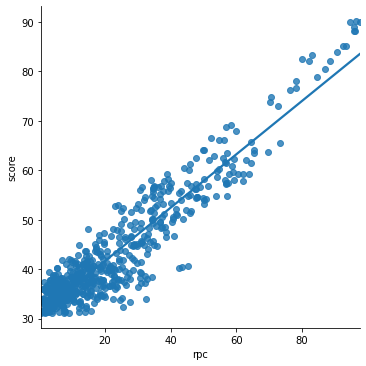

In [12]:
#relation between rpc and score looks linear, so its good
sns.lmplot(x="rpc", y="score", data=data, fit_reg=True, ci=None)

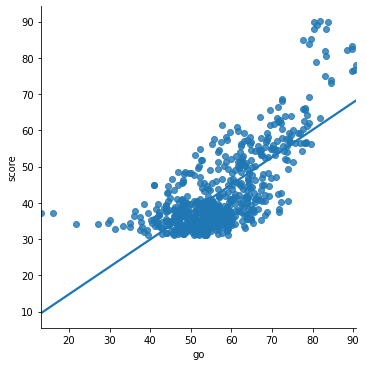

In [13]:
#relation between go and score is not looking too linear
sns.lmplot(x="go", y="score", data=data, fit_reg=True, ci=None)

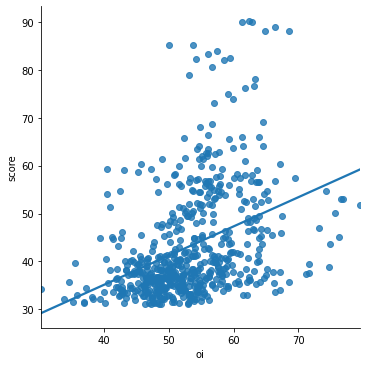

In [14]:
#relation between oi and score is not too linear
sns.lmplot(x="oi", y="score", data=data, fit_reg=True, ci=None)

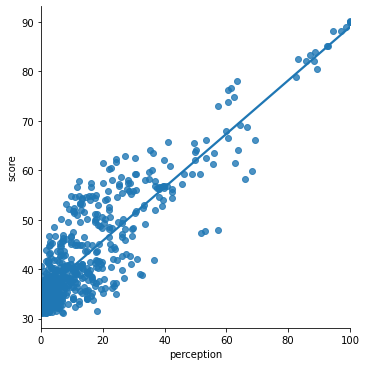

In [15]:
#relation between perception and score is linear
sns.lmplot(x="perception", y="score", data=data, fit_reg=True, ci=None)

In [16]:
#mean absolute error is our error metric
#we train our model then use this metric to check error margin

#Model Training in LINEAR REGRESSION

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
predictors = ["tlr", "rpc", "go","oi", "perception"]
target = "score"


In [17]:
reg.fit(train_data[predictors], train_data["score"])

LinearRegression()

In [19]:
predictions = reg.predict(test_data[predictors])

In [20]:
predictions

array([51.29542735, 33.63485233, 82.72538377, 35.68128081, 35.59985376,
       38.01328469, 52.95038773, 31.71849783, 31.62835873, 39.38560527,
       38.63426787, 43.24938793, 38.07670699, 53.93976192, 65.46725221,
       56.1424016 , 49.17641875, 37.98410006, 40.25718682, 37.20803204,
       30.86614866, 58.63276871, 46.64062052, 40.42076484, 32.79205779,
       38.11126193, 50.64299634, 43.02669353, 58.03268351, 69.38027925,
       59.88435888, 47.59557037, 34.82987496, 35.26273161, 37.32504085,
       34.20239603, 51.21770036, 33.53379939, 44.43098429, 38.15507969,
       33.82284241, 43.6946513 , 43.78430938, 34.3386026 , 39.45207586,
       48.28804648, 61.66354485, 33.22300905, 38.2651213 , 38.60178516,
       41.37047972, 38.17338983, 39.63709801, 40.45538091, 61.7779182 ,
       54.61796647, 33.9003613 , 35.34991654, 34.43029815, 51.64606368,
       57.07304713, 36.12936772, 33.96378466, 42.41138063, 34.61463512,
       36.44431596, 31.92788949, 41.73266589, 36.37327037, 35.98

In [21]:
test_data["predictions"] = predictions

In [23]:
test_data["predictions"] = test_data["predictions"].round(2)

In [24]:
test_data

,institute_id,name,tlr,rpc,go,oi,perception,city,state,rank,Year,score,predictions
42,IR-E-U-0014,International Institute of Information Technol...,53.01,36.66,73.92,52.91,24.77,Hyderabad,Telangana,43,2020,49.45,51.30
151,IR-E-C-37064,Sri Krishna College of Technology,51.06,4.37,58.86,46.60,3.71,Coimbatore,Tamil Nadu,152,2020,33.43,33.63
204,IR-E-U-0573,Indian Institute of Technology Kharagpur,80.51,88.59,83.01,58.46,88.50,Kharagpur,West Bengal,5,2021,82.03,82.73
333,IR-E-C-19754,SR University,62.51,6.49,41.74,62.54,8.07,Warangal,Telangana,134,2021,36.11,35.68
326,IR-E-U-0175,YMCA University of Science & Tech (Formerely Y...,59.79,6.05,55.73,50.04,6.83,Faridabad,Haryana,127,2021,36.59,35.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,IR-E-C-36022,Lakshmi Narain College of Technology,51.79,1.86,57.61,55.45,0.74,Bhopal,Madhya Pradesh,184,2021,33.23,33.77
205,IR-E-U-0560,Indian Institute of Technology Roorkee,79.28,78.13,90.74,63.36,63.59,Roorkee,Uttarakhand,6,2021,78.08,78.18
549,IR-E-C-6581,Puducherry Engineering College,46.38,15.51,59.49,54.20,8.80,Puducherry,Puducherry,150,2022,36.77,38.88
404,IR-E-U-0573,"Indian Institute of Technology, Kharagpur",79.21,84.60,80.91,53.08,82.63,Kharagpur,West Bengal,5,2022,78.89,79.16


In [25]:
#calculating mean error, i.e on average how far away we were from actual score
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(test_data["score"], test_data["predictions"])

In [26]:
error

0.9465833333333336

In [27]:
#mean error should be less than std(standard deviation)
data.describe()["score"]

count    600.000000
mean      43.176733
std       11.545820
min       31.090000
25%       35.262500
50%       38.710000
75%       48.415000
max       90.190000
Name: score, dtype: float64